##                      Projet d'Analyse des données et extraction de texte

In [1]:
#importer les modules requis
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

%matplotlib inline

## Chargement du dataset 20newsgroups en scikit-learn

In [2]:
# importation de 20 newsgroup dataset
from sklearn.datasets import fetch_20newsgroups

#categories = ['alt.atheism', 'comp.graphics', 'sci.space']
categories = None
data_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=categories)
data_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=categories)

In [3]:
type(data_train)
type(data_test)

sklearn.utils.Bunch

In [4]:
print ("Train data target labels:",data_train.target)
print ("Test data target labels:",data_test.target)

Train data target labels: [7 4 4 ... 3 1 8]
Test data target labels: [ 7  5  0 ...  9  6 15]


In [5]:
print ("Train data target names:",data_train.target_names)
print ("Test data target names:",data_test.target_names)

Train data target names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Test data target names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
print ("Total train data:",len(data_train.data))
print ("Total test data:",len(data_test.data))

Total train data: 11314
Total test data: 7532


In [7]:
# Type de train data 
print (type(data_train.data))
print (type(data_train.target))

# Type de test data 
print (type(data_test.data))
print (type(data_test.target))

<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


## Traitement et transformation de texte

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data_train)
X_train_counts.shape

(5, 5)

In [10]:
count_vect.vocabulary_.get(u'algorithm')

In [11]:
# convertir les données textuelles en vecteurs de valeurs numériques à l’aide de tf-idf pour former un vecteur
vectorizer = TfidfVectorizer()
data_train_vectors = vectorizer.fit_transform(data_train.data)
data_test_vectors = vectorizer.transform(data_test.data)

## Analyse de données 

In [12]:
# Type de train data 
print (type(data_train_vectors.data))
print (type(data_train.target))

# Type de test data 
print (type(data_train_vectors.data))
print (type(data_train.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [13]:
# vérifier la forme de la matrice des caractéristiques
print (data_train_vectors.shape)

(11314, 101631)


In [15]:
# vérifier la forme de la réponse (dimension unique correspondant au nombre d’observations)
print (data_train.target.shape)

(11314,)


In [16]:
#  stocker la matrice de fonctionnalité de formation dans "Xtr"
Xtr = data_train_vectors
print ("Xtr:\n", Xtr)

# store training response vector in "ytr"
ytr = data_train.target
print ("ytr:",ytr)

Xtr:
   (0, 59216)	0.08725268270111304
  (0, 71850)	0.07616585088687908
  (0, 57393)	0.0923857759707218
  (0, 41979)	0.19506948098166685
  (0, 45885)	0.04116726358517173
  (0, 100208)	0.04162912251846176
  (0, 49932)	0.10311614467122757
  (0, 96395)	0.10736893400961603
  (0, 68409)	0.045794107112368615
  (0, 46814)	0.10862631323814369
  (0, 59079)	0.08409501360833291
  (0, 96433)	0.07424754622734692
  (0, 73373)	0.14022858154649154
  (0, 99911)	0.0818197705881931
  (0, 84276)	0.14185552804207183
  (0, 37287)	0.12458509983363618
  (0, 64931)	0.09279094041294153
  (0, 62746)	0.11325721998728744
  (0, 88143)	0.2242035496067306
  (0, 25590)	0.048870877324188766
  (0, 54632)	0.06048007039093347
  (0, 17936)	0.052663855225258106
  (0, 51136)	0.06865521705397437
  (0, 23480)	0.1123868370862882
  (0, 67670)	0.06456572940695553
  :	:
  (11313, 81742)	0.13241254413957532
  (11313, 81792)	0.14804499058455659
  (11313, 40387)	0.0867206848739519
  (11313, 47209)	0.15303400468821185
  (11313, 25475)

In [17]:

# stocker la matrice des fonctionnalités de test dans "Xtt"
Xtt = data_test_vectors
print ("Xtt:\n", Xtt)

# store testing response vector in "ytt"
ytt = data_test.target
print ("ytt:",ytt)

Xtt:
   (0, 100208)	0.04552652065236068
  (0, 99908)	0.09332616771302898
  (0, 97240)	0.11951258956562365
  (0, 96391)	0.05867573115101415
  (0, 93592)	0.24772115542399506
  (0, 92955)	0.11541103934826256
  (0, 89360)	0.06562103715075537
  (0, 89092)	0.14592509321427227
  (0, 88767)	0.044847221550678766
  (0, 88694)	0.05609512027045376
  (0, 88578)	0.07154608326188232
  (0, 88532)	0.2395528152171037
  (0, 88519)	0.03921639192748113
  (0, 88501)	0.06998314809025451
  (0, 88138)	0.09661130503410108
  (0, 86307)	0.14214443084125739
  (0, 84598)	0.15477036379403195
  (0, 83888)	0.09322903287306315
  (0, 81241)	0.14621282905564145
  (0, 72905)	0.2451939150765593
  (0, 70695)	0.1276914606142514
  (0, 68781)	0.06795439065647194
  (0, 68409)	0.0500814390762879
  (0, 68080)	0.04535867732725786
  (0, 67670)	0.14122099316299058
  :	:
  (7531, 54632)	0.07179487683313424
  (7531, 51223)	0.11159470709485804
  (7531, 51136)	0.16299891255024412
  (7531, 48650)	0.11268973116168066
  (7531, 47204)	0.374

## Apprentissage automatique

In [18]:
# importer le module requis à partir de scikit learn
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Implementation du modèle de classification- à l’aide de KNeighborsClassifier

# Instantané de l’estimateur
clf_knn =  KNeighborsClassifier(n_neighbors=5)

# Adapter le modèle avec des données(aka "model training")
clf_knn.fit(Xtr, ytr)

# Prédire la réponse à une nouvelle observation
y_pred = clf_knn.predict(Xtt)
print ("Predicted Class Labels:",y_pred)

# Prédire le score de réponse pour une nouvelle observation
y_pred_score_knn = clf_knn.predict_proba(Xtt)
print ("Predicted Score:\n",y_pred_score_knn)

Predicted Class Labels: [2 7 2 ... 1 2 2]
Predicted Score:
 [[0.2 0.  0.4 ... 0.2 0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.2 ... 0.  0.  0. ]
 ...
 [0.  0.2 0.2 ... 0.2 0.2 0. ]
 [0.  0.  0.2 ... 0.  0.  0. ]
 [0.  0.  0.2 ... 0.  0.  0. ]]



## Cross-validation: Sélection de modèles

In [25]:
# importer le module requis
from sklearn.model_selection import cross_val_score

In [27]:
# 10-fold cross-validation avec le modèle KNN
clf_knn = KNeighborsClassifier(n_neighbors=55)
print ("KNN 10-Cross Validation Score:",cross_val_score (clf_knn, Xtr, ytr, cv=10, scoring='accuracy').mean())

KNN 10-Cross Validation Score: 0.07070746360986399


## Réglage de paramètre plus efficace à l’aide de GridSearchCV


In [28]:
# importer le module requis
from sklearn.model_selection import GridSearchCV

## GridSearchCV for KNN

In [29]:
# définir les valeurs paramètres qui doivent être recherchées pour KNN
k_range = range(1, 100)
weight_options = ['uniform', 'distance']
print (k_range)
print (weight_options)

range(1, 100)
['uniform', 'distance']


In [30]:

# créer une grille de paramètres : cartographiez les noms de paramètres aux valeurs à rechercher pour KNN
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print (param_grid)

{'n_neighbors': range(1, 100), 'weights': ['uniform', 'distance']}


In [31]:
# instantané de la grille
grid = GridSearchCV(clf_knn, param_grid, cv=10, scoring='accuracy')

In [32]:
# adapter la grille avec les données
grid.fit(Xtr, ytr)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=55, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 100),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [34]:

# voir les résultats complets (liste nommés des tuples)


grid.cv_results_

{'mean_fit_time': array([0.01735468, 0.01835513, 0.01735492, 0.01795313, 0.01655729,
        0.01885073, 0.01665652, 0.01735427, 0.01665664, 0.01785321,
        0.01655729, 0.01835153, 0.01635787, 0.01765344, 0.01685665,
        0.01775355, 0.01595826, 0.01725445, 0.01635799, 0.01795828,
        0.01615922, 0.01735437, 0.01605821, 0.01665685, 0.016557  ,
        0.01885064, 0.01635773, 0.01755469, 0.01595855, 0.01725531,
        0.01635759, 0.01715522, 0.01645792, 0.01815255, 0.01685677,
        0.01775365, 0.01795657, 0.01735401, 0.016658  , 0.01745408,
        0.01675627, 0.01765413, 0.01685641, 0.01745327, 0.01675653,
        0.01735418, 0.01586027, 0.01735485, 0.01605866, 0.0168566 ,
        0.01625786, 0.01695251, 0.01585946, 0.01685562, 0.01605909,
        0.01675591, 0.01595926, 0.01705487, 0.01735539, 0.01744998,
        0.01605883, 0.01685607, 0.01635804, 0.01705523, 0.01626189,
        0.01665618, 0.01685696, 0.01715498, 0.01675646, 0.01704764,
        0.01595967, 0.01695213,

In [36]:
# examiner le meilleur modèle
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.17606608492437661
{'n_neighbors': 2, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')


## Réduction des dépenses informatiques à l’aide de RandomizedSearchCV pour KNN



In [37]:
# importation du module requis
from sklearn.model_selection import RandomizedSearchCV

In [38]:
# spécifier les " distributions de paramètres " plutôt qu’une "grille de paramètres"
param_dist = dict(n_neighbors=k_range, weights=weight_options)
print (param_dist)

{'n_neighbors': range(1, 100), 'weights': ['uniform', 'distance']}


In [39]:
# n_iter contrôle le nombre de recherches
rand = RandomizedSearchCV(clf_knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(Xtr, ytr)
rand.cv_results_

{'mean_fit_time': array([0.01895039, 0.01735492, 0.01815276, 0.01665726, 0.01835172,
        0.01755409, 0.01825264, 0.01665576, 0.01605673, 0.01715498]),
 'std_fit_time': array([0.00154453, 0.00079715, 0.0014656 , 0.00109622, 0.00101652,
        0.00179455, 0.00194614, 0.00126558, 0.00029979, 0.00086962]),
 'mean_score_time': array([0.98536458, 0.97648757, 0.99443972, 1.01857512, 0.99543793,
        1.0143867 , 1.01418703, 1.00451314, 0.9949393 , 0.97050443]),
 'std_score_time': array([0.00907443, 0.01279082, 0.01740886, 0.01045052, 0.01918682,
        0.01304465, 0.01081988, 0.01059962, 0.01136438, 0.01276786]),
 'param_weights': masked_array(data=['distance', 'distance', 'distance', 'uniform',
                    'distance', 'uniform', 'uniform', 'uniform', 'uniform',
                    'distance'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': 

In [40]:
# examiner le meilleur modèle
print (rand.best_score_)
print (rand.best_params_)

0.11348543925916901
{'weights': 'uniform', 'n_neighbors': 4}


## Précision de classification de KNN

In [41]:
import sklearn.metrics as metrics
#  Instantané de l’estimateur
clf_knn =  KNeighborsClassifier(n_neighbors=1, weights='distance')

# Adapter le modèle avec des données (aka "model training")
clf_knn.fit(Xtr, ytr)

# Prédire la réponse pour une nouvelle observation
y_pred_knn = clf_knn.predict(Xtt)
print ("Predicted Class Labels:",y_pred_knn)

# calculer accuracy
print ("Classification Accuracy:",metrics.accuracy_score(ytt, y_pred_knn))

Predicted Class Labels: [4 4 4 ... 4 4 4]
Classification Accuracy: 0.11338289962825279


## Matrice de confusion de KNN

In [43]:
# premier argument est de vraies valeurs, deuxième argument est prédit valeurs
print (metrics.confusion_matrix(ytt, y_pred_knn))

[[ 21   0   0   0 291   0   0   1   1   0   0   3   0   0   0   1   0   0
    0   1]
 [  0  20   0   0 368   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0  12   1 376   1   0   0   0   0   0   0   1   0   2   0   0   0
    0   1]
 [  0   1   2  38 350   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0 385   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   1   2 366  25   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   1 337   0  45   0   1   4   0   0   2   0   0   0   0   0
    0   0]
 [  0   0   0   0 383   1   0  11   1   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   1   0 371   0   0   0  26   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 382   0   0   0   0  15   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 354   0   0   0   1   0  43   0   0   1   0   0   0   0
    0   0]
 [  0   0   1   0 363   0   0   0   0   0   1  27   0   0   0   0

## Mesures calculées à partir d’une matrice de confusion

In [44]:
print ("Classification Error of KNN:", 1 - metrics.accuracy_score(ytt, y_pred_knn))

Classification Error of KNN: 0.8866171003717472


In [45]:
print ("Sensitivity of KNN:",metrics.recall_score(ytt, y_pred_knn, average='weighted'))

Sensitivity of KNN: 0.11338289962825279


In [46]:
print ("Precision of KNN:", metrics.precision_score(ytt, y_pred_knn, average='weighted'))

Precision of KNN: 0.786268523482684


In [47]:
print ("F-measure of KNN:", metrics.f1_score(ytt, y_pred_knn, average='weighted'))

F-measure of KNN: 0.1193387867516638


## Courbes ROC et zone sous la courbe (AUC)



In [51]:

# importation des modules requis
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [52]:
def ROC_multi_class(Xtr, ytr, Xtt, ytt, clf):
    
    classes = [0,1, 2, 3, 4]
    # Binarize la sortie
    ytr = label_binarize(ytr, classes=classes)
    n_classes = ytr.shape[1]
    
    # Apprenez à prédire chaque classe par rapport à l’autre
    classifier = OneVsRestClassifier(clf)
    classifier.fit(Xtr, ytr)
    if (clf == clf_knn):
        
    
        y_pred_score = classifier.predict_proba(Xtt)
    
    ytt = label_binarize(ytt, classes=classes)
    
    
    # Courbe ROC de calcul et zone ROC pour chaque classe
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(ytt[:, i], y_pred_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    
    # Plot Courbes ROC pour la multiclasse
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                       ''.format(i+1, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC of multi-class')
    plt.legend(loc="lower right")
    plt.show()

## ROC multi-classes de KNN

ROC and AUC of KNN


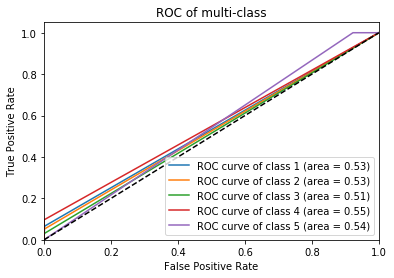

In [53]:
print ("ROC and AUC of KNN")
ROC_multi_class(Xtr, ytr, Xtt, ytt, clf_knn)

## Courbes de relations publiques et zone sous la courbe PR (AUC-PR)

In [54]:
# importation du module requis
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [55]:
def PR_multi_class(Xtr, ytr, Xtt, ytt, clf):
    
    classes = [0,1, 2, 3, 4]
    # Binarize la sortie
    ytr = label_binarize(ytr, classes=classes)
    n_classes = ytr.shape[1]
    
    # Apprenez à prédire chaque classe par rapport à l’autre
    classifier = OneVsRestClassifier(clf)
    classifier.fit(Xtr, ytr)
    if (clf == clf_knn):
        
        y_pred_score = classifier.predict_proba(Xtt)
    
    ytt = label_binarize(ytt, classes=classes)
    
    # Calculez la précision-Recall et plot la courbe 
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(ytt[:, i], y_pred_score[:, i])
        average_precision[i] = average_precision_score(ytt[:, i], y_pred_score[:, i])
    
    for i in range(n_classes):
        plt.plot(recall[i], precision[i], label='PR curve of class {0} (area = {1:0.2f})'
                       ''.format(i+1, average_precision[i]))
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve of multi-class')
    plt.legend(loc="lower right")
    plt.show()

PR and AUC of KNN


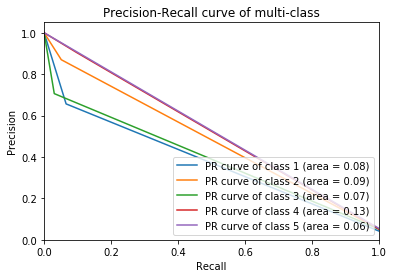

In [56]:
# Courbe PR de KNeighborsClassifier
print ("PR and AUC of KNN")
PR_multi_class(Xtr, ytr, Xtt, ytt, clf_knn)